# My first neural net

Date: 20/08/2019
I decided to understand how the chain rule is applied on neural nets and I wrote this piece of code. 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [6]:
#Activation functions
def sigmoid(x):
    return 1/(1 + np.exp(-x))

#Derivative of the sigmoid function
def sigmoid_prime(x):
    return sigmoid(x)*(1.0 - sigmoid(x))


In [19]:
# Simple artificila neural net
class ANN(object):
    def __init__(self, architecture : np.ndarray):
        # initialize neural_net
        self.n = architecture
        self.L = len(architecture) - 1
      
        # initialize neurons
        self.a = {}
        self.z = {}
        
        for n in range(0, self.L+1):
            self.a[n]   = np.ones(shape=(self.n[n],1))
            if n>0:
                self.z[n]   = np.ones(shape=(self.n[n],1))
    
            
        # initialize weights and bias    
        self.w = {}
        self.b = {}
        
        #initialize derivatives 
    
        self.dcdz ={}
        self.dzdw ={}
        
        self.dcdw ={}
        self.dcdb ={}
        
        for n in range(1,self.L+1):
            
            # weights and bias
            np.random.seed(seed=20)
            self.w[n]      = np.random.randn(self.n[n],self.n[n - 1]) * np.sqrt(1/self.n[n])
            self.b[n]      = np.ones((self.n[n],1))
            
            # chain rule derivatives 
            self.dcdz[n]   = np.random.randn(self.n[n],1)
            self.dzdw[n]   = np.random.randn(self.n[n],1)
            
            # partial loss derivative
            self.dcdw[n]   = np.random.randn(self.n[n],self.n[n-1])
            self.dcdb[n]   = np.random.randn(self.n[n],1)
            
    
    def forward_propagation(self,X_input):
        # Sanity check
        if len(X_input) != self.n[0]:
            print("Check your input size - Code exit in foward propagation")
            return
        
        # Initialize first layer:
        self.a[0] = X_input
      
        # Feed-forward propagation
        for n in range(1,self.L + 1):
            self.z[n] = np.add(np.dot(self.w[n],self.a[n-1]),self.b[n])
            self.a[n] = sigmoid(self.z[n]) #sigmoid as activation function
                                   
    def compute_cost(self,Y_true): 
        
        # calculate loss -> RME
     #   loss = np.sum((self.a[self.L] - Y_true)**2.0)
        
        # calculate loss -> cross entropy
        loss = np.sum((-Y_true*np.log(self.a[self.L]) + (1-Y_true)*np.log( 1 - self.a[self.L])))
        
        return loss

    def compute_gradients(self,Y_true): 
        if len(Y_true) != self.n[self.L]:
            print("Check your input size - Code exit in upgrade gradients")
            return 

        # Last layer
        # root mean square error 
        #self.dcdz[self.L] = 2 * (self.a[self.L]- Y_true) * self.a[self.L] * (1 - self.a[self.L])
        # cross entropy
        self.dcdz[self.L] = np.add(self.a[self.L],-Y_true)
        
        
        self.dzdw[self.L] = self.a[self.L-1]
        self.dcdw[self.L] = np.dot(self.dcdz[self.L],np.transpose(self.dzdw[self.L])) 
        self.dcdb[self.L] = self.dcdz[self.L] 
        
        # Hidden layers 
        for n in range(self.L-1, 0, -1):
            self.dcdz[n] = np.dot(np.transpose(self.w[n+1]),self.dcdz[n+1]) * sigmoid_prime(self.z[n])
            self.dzdw[n] = self.a[n-1]
            self.dcdw[n] = np.dot(self.dcdz[n],np.transpose(self.dzdw[n])) 
            self.dcdb[n] = self.dcdz[n]
   
    def update_parameters(self,alpha):
        # update weights
        for n in range(1,self.L+1):
            self.w[n] -= alpha*self.dcdw[n]
            self.b[n] -= alpha*self.dcdb[n]
            
    def fit(self,X, y, epoch=50,alpha=0.001 ):
        
        ep = []
        loss =[]
        for j in range(0, epoch):
            c = 0 #Stores the cost
            for i in range(len(X)):
                x_i = X[i].reshape(-1, 1)
                y_i = y[i].reshape(-1, 1)
                self.forward_propagation(x_i)
                self.compute_gradients(y_i)
                self.update_parameters(alpha)
                c += self.compute_cost(y_i)
            ep += [j]    
            loss += [c/len(X)]
        return ep, loss
    
    
    def predict(self,X):
        self.forward_propagation(X)
        print("Prediction: %s" %self.a[self.L]) 
        
    def accuracy(self,X,y):
        nc = 0
        for i in range(len(X)):
            x_i = X[i].reshape(-1, 1)
            y_i = y[i]
            self.forward_propagation(x_i)
            if self.a[self.L] >= 0.5:
                surv = 1
            elif self.a[self.L] < 0.5:
                surv = 0
            if y_i == surv:
                nc += 1   
        print("Accuracy: %s" %(nc/len(X)))
    
        
            

In [20]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize

n_samples = 1000
df = datasets.make_moons(n_samples=n_samples, noise=.05)

X_train, X_test, y_train, y_test = train_test_split(df[0], df[1], test_size=0.1, random_state=4)

dataplot = np.transpose(X_train)

myfirstnn1 = ANN([2,3,1])
ep, loss = myfirstnn1.fit(X_train,y_train,epoch=20,alpha=0.005)

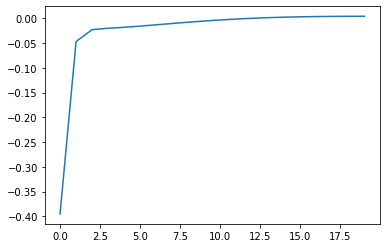

In [21]:
plt.plot(ep,loss)


In [22]:
myfirstnn1.accuracy(X_train,y_train)


Accuracy: 0.8777777777777778


In [23]:
n_samples = 1500
df = datasets.make_circles(n_samples=n_samples, noise=.05)

X_train, X_test, y_train, y_test = train_test_split(df[0], df[1], test_size=0.1, random_state=4)

dataplot = np.transpose(X_train)

myfirstnn2 = ANN([2,3,1])
ep, loss = myfirstnn2.fit(X_train,y_train,epoch=500,alpha=0.007)

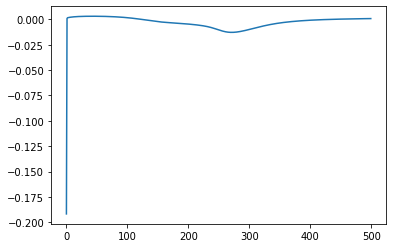

In [24]:
plt.plot(ep,loss)

In [25]:
myfirstnn2.accuracy(X_train,y_train)

Accuracy: 0.9118518518518518
